In [193]:
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\Dimpalbabu\\Desktop\\Dataset\\Call_Centre.xlsx")
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False


In [3]:
df['Date'].head()

0   2016-01-01 09:12:58.000
1   2016-01-01 09:12:57.600
2   2016-01-01 09:47:31.200
3   2016-01-01 09:47:31.200
4   2016-01-01 10:00:28.800
Name: Date, dtype: datetime64[ns]

In [4]:
df['Week_Number'] = df['Date'].dt.strftime('%U')

In [5]:
df.head(2)

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00


Total Calls
Calls Answered
Avg Speed of Answer
Abandon Rate
Avg Call/Min
Satisfaction Overall
Calls of Less than 180 Seconds
% Calls of Less than 180 Seconds
Satisfaction less than equal to 3


In [6]:
df.columns=['call_id','Date','Agent','Department','Answered','Resolved','Speed_of_ans','Avg_talk_duration','Satisfaction_rating','Column1','Week_Number']

In [7]:
total_call=df.groupby("Week_Number")['Answered'].count()
total_call

Week_Number
00    118
01    396
02    404
03    366
04    428
05     60
Name: Answered, dtype: int64

In [8]:
df.head(2)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00


In [9]:
answered_call=df.groupby('Week_Number')['Answered'].value_counts()
answered_call[0]

94

In [10]:
df.head(10)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,00
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,00
5,ID0006,2016-01-01 10:00:28.800,Stewart,Air Conditioner,N,N,NaN,NaN,NaN,False,00
6,ID0007,2016-01-01 10:22:04.800,Diane,Toaster,Y,Y,24.0,00:03:40.342000,2.0,False,00
7,ID0008,2016-01-01 10:22:04.800,Diane,Toaster,Y,Y,22.0,00:00:38.344000,4.0,False,00
8,ID0009,2016-01-01 11:13:55.200,Greg,Fridge,Y,Y,15.0,00:06:38.450000,4.0,False,00
9,ID0010,2016-01-01 11:13:55.200,Jim,Television,Y,Y,78.0,00:01:03.753000,3.0,False,00


In [11]:
avg_speed_ans=df.groupby('Week_Number')['Speed_of_ans'].mean()
avg_speed_ans

Week_Number
00    66.936170
01    70.547988
02    66.555882
03    66.566434
04    65.431319
05    67.541667
Name: Speed_of_ans, dtype: float64

#Abandon Rate

In [12]:
answered_call_n=df.groupby('Week_Number')['Answered'].value_counts().unstack()
answered_call_n

Answered,N,Y
Week_Number,,
00,24,94
01,73,323
02,64,340
03,80,286
04,64,364
05,12,48


In [13]:
del answered_call_n['Y']

In [14]:
answered_call_n

Answered,N
Week_Number,
00,24
01,73
02,64
03,80
04,64
05,12


In [15]:
total_call

Week_Number
00    118
01    396
02    404
03    366
04    428
05     60
Name: Answered, dtype: int64

In [16]:
answered_call_n

Answered,N
Week_Number,
00,24
01,73
02,64
03,80
04,64
05,12


In [17]:
abandon_rate=(answered_call_n['N']/total_call)*100
abandon_rate

Week_Number
00    20.338983
01    18.434343
02    15.841584
03    21.857923
04    14.953271
05    20.000000
dtype: float64

In [18]:
df.head(2)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00


In [19]:
satisfaction_overall=df['Satisfaction_rating'].mean()
satisfaction_overall

3.4542955326460483

In [20]:
satisfaction_weekly=df.groupby('Week_Number')['Satisfaction_rating'].mean()
satisfaction_weekly

Week_Number
00    3.351064
01    3.498452
02    3.397059
03    3.597902
04    3.414835
05    3.208333
Name: Satisfaction_rating, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 11 columns):
call_id                1772 non-null object
Date                   1772 non-null datetime64[ns]
Agent                  1772 non-null object
Department             1772 non-null object
Answered               1772 non-null object
Resolved               1772 non-null object
Speed_of_ans           1455 non-null float64
Avg_talk_duration      1455 non-null object
Satisfaction_rating    1455 non-null float64
Column1                1772 non-null bool
Week_Number            1772 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), object(7)
memory usage: 140.2+ KB


In [22]:
df = pd.read_excel("C:\\Users\\Dimpalbabu\\Desktop\\Dataset\\Call_Centre.xlsx")
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False


In [23]:
df['Week_Number'] = df['Date'].dt.strftime('%U')

In [24]:
df.columns=['call_id','Date','Agent','Department','Answered','Resolved','Speed_of_ans','Avg_talk_duration','Satisfaction_rating','Column1','Week_Number']

In [25]:
df.head()

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,00
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,00


In [26]:
from datetime import *  
from datetime import datetime  
import datetime as dt  
import time

In [27]:
df['Avg_talk_duration'].head()

0    00:02:23.210000
1    00:04:02.323000
2    00:02:11.202000
3    00:00:37.481000
4    00:01:00.083000
Name: Avg_talk_duration, dtype: object

In [28]:
satisfaction_3=df.query("Satisfaction_rating<=3")
sat_3=satisfaction_3.groupby("Week_Number")['Satisfaction_rating'].count()
sat_3

Week_Number
00     54
01    156
02    178
03    123
04    187
05     26
Name: Satisfaction_rating, dtype: int64

In [29]:
def getweekdata(week):
    if week==0:
        print("Total calls are-:",total_call[0])
        print("Total call answered-:",answered_call[0])
        print("Avg speed of answer-:",avg_speed_ans[0])
        print("Abandon Rate-:",abandon_rate[0])
        print("Satisfaction overall-:",satisfaction_weekly[0])
        print("Satisfaction less then or equalto 3-:",sat_3[0])
    elif week==1:
        print("Total calls are:-",total_call[1])
        print("Total call answered-:",answered_call[1])
        print("Avg speed of answer-:",avg_speed_ans[1])
        print("Abandon Rate-:",abandon_rate[1])
        print("Satisfaction overall-:",satisfaction_weekly[1])
        print("Satisfaction less then or equalto 3-:",sat_3[1])
    elif week==2:
        print("Total calls are:-",total_call[2])
        print("Total call answered-:",answered_call[2])
        print("Avg speed of answer-:",avg_speed_ans[2])
        print("Abandon Rate-:",abandon_rate[2])
        print("Satisfaction overall-:",satisfaction_weekly[2])
        print("Satisfaction less then or equalto 3-:",sat_3[2])
    elif week==3:
        print("Total calls are:-",total_call[3])
        print("Total call answered-:",answered_call[3])
        print("Avg speed of answer-:",avg_speed_ans[3])
        print("Abandon Rate-:",abandon_rate[3])
        print("Satisfaction overall-:",satisfaction_weekly[3])
        print("Satisfaction less then or equalto 3-:",sat_3[3])
    elif week==4:
        print("Total calls are:-",total_call[4])
        print("Total call answered-:",answered_call[4])
        print("Avg speed of answer-:",avg_speed_ans[4])
        print("Abandon Rate-:",abandon_rate[4])
        print("Satisfaction overall-:",satisfaction_weekly[4])
        print("Satisfaction less then or equalto 3-:",sat_3[4])
    elif week==5:
        print("Total calls are:-",total_call[5])
        print("Total call answered-:",answered_call[5])
        print("Avg speed of answer-:",avg_speed_ans[5])
        print("Abandon Rate-:",abandon_rate[5])
        print("Satisfaction overall-:",satisfaction_weekly[5])
        print("Satisfaction less then or equalto 3-:",sat_3[5])
    else:
        print("No records found")
    

In [30]:
getweekdata(2)

Total calls are:- 404
Total call answered-: 323
Avg speed of answer-: 66.55588235294118
Abandon Rate-: 15.841584158415841
Satisfaction overall-: 3.3970588235294117
Satisfaction less then or equalto 3-: 178


In [31]:
df.head(3)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00


In [32]:
total_call_agent = df.groupby("Agent")['Answered'].count()
total_call_agent

Agent
Becky      216
Dan        227
Diane      222
Greg       208
Jim        228
Joe        221
Martha     220
Stewart    230
Name: Answered, dtype: int64

In [33]:
answered_call_agent = df.groupby("Agent")['Answered'].value_counts()
answered_call_agent

Agent    Answered
Becky    Y           177
         N            39
Dan      Y           190
         N            37
Diane    Y           185
         N            37
Greg     Y           173
         N            35
Jim      Y           187
         N            41
Joe      Y           186
         N            35
Martha   Y           171
         N            49
Stewart  Y           186
         N            44
Name: Answered, dtype: int64

In [34]:
avg_ans_agent = df.groupby("Agent")['Speed_of_ans'].mean()
avg_ans_agent

Agent
Becky      64.350282
Dan        66.952632
Diane      63.935135
Greg       67.196532
Jim        66.663102
Joe        71.155914
Martha     71.456140
Stewart    66.241935
Name: Speed_of_ans, dtype: float64

In [35]:
resolved_call = df.groupby("Agent")['Resolved'].value_counts()
resolved_call

Agent    Resolved
Becky    Y           154
         N            62
Dan      Y           177
         N            50
Diane    Y           168
         N            54
Greg     Y           155
         N            53
Jim      Y           173
         N            55
Joe      Y           169
         N            52
Martha   Y           152
         N            68
Stewart  Y           163
         N            67
Name: Resolved, dtype: int64

In [36]:
resolved_call

Agent    Resolved
Becky    Y           154
         N            62
Dan      Y           177
         N            50
Diane    Y           168
         N            54
Greg     Y           155
         N            53
Jim      Y           173
         N            55
Joe      Y           169
         N            52
Martha   Y           152
         N            68
Stewart  Y           163
         N            67
Name: Resolved, dtype: int64

In [37]:
resolved_call_y = resolved_call.unstack()
resolved_call_y

Resolved,N,Y
Agent,,
Becky,62,154
Dan,50,177
Diane,54,168
Greg,53,155
Jim,55,173
Joe,52,169
Martha,68,152
Stewart,67,163


In [38]:
del resolved_call_y['N']

In [39]:
resolved_call_y=resolved_call_y.unstack()
resolved_call_y

Resolved  Agent  
Y         Becky      154
          Dan        177
          Diane      168
          Greg       155
          Jim        173
          Joe        169
          Martha     152
          Stewart    163
dtype: int64

In [40]:
resolved_percent = (resolved_call/total_call_agent)*100
resolved_percent

Agent    Resolved
Becky    Y           71.296296
         N           28.703704
Dan      Y           77.973568
         N           22.026432
Diane    Y           75.675676
         N           24.324324
Greg     Y           74.519231
         N           25.480769
Jim      Y           75.877193
         N           24.122807
Joe      Y           76.470588
         N           23.529412
Martha   Y           69.090909
         N           30.909091
Stewart  Y           70.869565
         N           29.130435
dtype: float64

In [41]:
del resolved_percent['N']

KeyError: 'N'

In [42]:
resolved_percent

Agent    Resolved
Becky    Y           71.296296
         N           28.703704
Dan      Y           77.973568
         N           22.026432
Diane    Y           75.675676
         N           24.324324
Greg     Y           74.519231
         N           25.480769
Jim      Y           75.877193
         N           24.122807
Joe      Y           76.470588
         N           23.529412
Martha   Y           69.090909
         N           30.909091
Stewart  Y           70.869565
         N           29.130435
dtype: float64

In [43]:
def getagentdata(name):
    if name=='Becky':
        print("Total calls are-:",total_call_agent[0])
        print("Total call answered-:",answered_call_agent[0])
        print("Avg speed of answer-:",avg_ans_agent[0])
        print("Resolution Rate-:",resolved_percent[0])
        print("Call resolved-:",resolved_call_y[0])
    elif name=='Dan':
        print("Total calls are-:",total_call_agent[1])
        print("Total call answered-:",answered_call_agent[1])
        print("Avg speed of answer-:",avg_ans_agent[1])
        print("Resolution Rate-:",resolved_percent[1])
        print("Call resolved-:",resolved_call_y[1])
    elif name=='Diane':
        print("Total calls are-:",total_call_agent[2])
        print("Total call answered-:",answered_call_agent[2])
        print("Avg speed of answer-:",avg_ans_agent[2])
        print("Resolution Rate-:",resolved_percent[2])
        print("Call resolved-:",resolved_call_y[2])
    elif name=='Greg':
        print("Total calls are-:",total_call_agent[3])
        print("Total call answered-:",answered_call_agent[3])
        print("Avg speed of answer-:",avg_ans_agent[3])
        print("Resolution Rate-:",resolved_percent[3])
        print("Call resolved-:",resolved_call_y[3])
    elif name=='Jim':
        print("Total calls are-:",total_call_agent[4])
        print("Total call answered-:",answered_call_agent[4])
        print("Avg speed of answer-:",avg_ans_agent[4])
        print("Resolution Rate-:",resolved_percent[4])
        print("Call resolved-:",resolved_call_y[4])
    elif name=='Joe':
        print("Total calls are-:",total_call_agent[5])
        print("Total call answered-:",answered_call_agent[5])
        print("Avg speed of answer-:",avg_ans_agent[5])
        print("Resolution Rate-:",resolved_percent[5])
        print("Call resolved-:",resolved_call_y[5])
    elif name=='Martha':
        print("Total calls are-:",total_call_agent[6])
        print("Total call answered-:",answered_call_agent[6])
        print("Avg speed of answer-:",avg_ans_agent[6])
        print("Resolution Rate-:",resolved_percent[6])
        print("Call resolved-:",resolved_call_y[6])
    elif name=='Stewart':
        print("Total calls are-:",total_call_agent[7])
        print("Total call answered-:",answered_call_agent[7])
        print("Avg speed of answer-:",avg_ans_agent[7])
        print("Resolution Rate-:",resolved_percent[7])
        print("Call resolved-:",resolved_call_y[7])
    else:
        print("No records found!!")
        
        

In [44]:
getagentdata('Martha')

Total calls are-: 220
Total call answered-: 173
Avg speed of answer-: 71.45614035087719
Resolution Rate-: 74.51923076923077
Call resolved-: 152


In [234]:
df.head(5)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00,1
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,00,1
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,00,1


In [46]:
df['Day'] = df['Date'].dt.day

In [245]:
total_call_becky = df[df.Agent=='Becky'].Answered.count()
total_call_dan = df[df.Agent=='Dan'].Answered.count()
total_call_diane = df[df.Agent=='Diane'].Answered.count()
total_call_greg = df[df.Agent=='Greg'].Answered.count()
total_call_jim = df[df.Agent=='Jim'].Answered.count()
total_call_joe = df[df.Agent=='Joe'].Answered.count()
total_call_martha = df[df.Agent=='Martha'].Answered.count()
total_call_stewart = df[df.Agent=='Stewart'].Answered.count()
total_call_becky

                    

216

In [212]:
totalcall_day_y = df.groupby(['Agent','Day'])['Answered'].value_counts().unstack()
totalcall_day_y

Answered       N     Y
Agent   Day           
Becky   1    1.0   7.0
        2    1.0   8.0
        3    NaN   5.0
        4    1.0   4.0
        5    NaN   5.0
        6    2.0   1.0
        7    2.0   5.0
        8    1.0   3.0
        9    1.0   6.0
        10   1.0   7.0
        11   1.0   8.0
        12   1.0   5.0
        13   2.0   6.0
        14   1.0   5.0
        15   1.0   8.0
        16   2.0   9.0
        17   1.0   5.0
        18   2.0   5.0
        19   2.0   5.0
        20   NaN   7.0
        21   2.0   2.0
        22   2.0   8.0
        23   1.0   4.0
        24   2.0   3.0
        25   3.0   6.0
        26   2.0   7.0
        27   NaN   5.0
        28   1.0   6.0
        29   2.0   2.0
        30   1.0  12.0
...          ...   ...
Stewart 2    2.0   6.0
        3    2.0   3.0
        4    NaN   6.0
        5    2.0   1.0
        6    NaN  15.0
        7    1.0   4.0
        8    2.0   4.0
        9    1.0   7.0
        10   2.0   5.0
        11   3.0  17.0
        12   2.0   4.0
        13   1.0   3.0
        14   1.0   4.0
        15   NaN   7.0
        16   3.0   7.0
        17   1.0   6.0
        18   2.0   8.0
        19   1.0   5.0
        20   3.0   7.0
        21   NaN   4.0
        22   3.0   3.0
        23   1.0   4.0
        24   NaN   4.0
        25   1.0   7.0
        26   3.0   4.0
        27   NaN   4.0
        28   NaN   6.0
        29   4.0   6.0
        30   2.0  12.0
        31   NaN   8.0

[248 rows x 2 columns]

In [213]:
del totalcall_day_y['N']

In [220]:
becky_y_call=totalcall_day_y.unstack().iloc[0,:]
dan_y_call=totalcall_day_y.unstack().iloc[1,:]
diane_y_call=totalcall_day_y.unstack().iloc[2,:]
greg_y_call=totalcall_day_y.unstack().iloc[3,:]
jim_y_call=totalcall_day_y.unstack().iloc[4,:]
joe_y_call=totalcall_day_y.unstack().iloc[5,:]
martha_y_call=totalcall_day_y.unstack().iloc[6,:]
stewart_y_call=totalcall_day_y.unstack().iloc[7,:]


In [238]:
avgcall_day_becky = df[df.Agent=='Becky'].Speed_of_ans.mean()
avgcall_day_y

64.35028248587571

In [107]:
resolved_call = df.groupby(["Agent",'Day'])['Resolved'].value_counts().unstack()
resolved_call
del resolved_call['N']

In [125]:
total_resolved_call=resolved_call.unstack()
total_resolved_call

Resolved    Y                                                     ...       \
Day        1    2     3     4     5     6    7    8     9     10  ...   22   
Agent                                                             ...        
Becky     6.0  7.0   3.0   2.0   5.0   NaN  5.0  3.0   5.0   7.0  ...  6.0   
Dan       4.0  7.0   6.0   4.0   6.0   2.0  5.0  6.0  10.0   7.0  ...  3.0   
Diane     7.0  7.0   5.0   3.0   8.0   3.0  4.0  5.0   5.0   7.0  ...  5.0   
Greg      6.0  2.0   4.0   3.0   8.0   5.0  7.0  6.0   4.0   7.0  ...  4.0   
Jim       5.0  6.0   5.0   6.0   1.0   7.0  6.0  4.0   6.0   6.0  ...  3.0   
Joe       8.0  3.0  10.0   6.0  10.0   5.0  9.0  5.0   8.0  11.0  ...  NaN   
Martha    2.0  5.0   5.0  10.0   6.0   5.0  3.0  NaN   6.0   5.0  ...  5.0   
Stewart   5.0  5.0   1.0   6.0   NaN  15.0  2.0  3.0   6.0   5.0  ...  2.0   

Resolved                                                 
Day        23   24   25    26    27   28   29   30   31  
Agent                                                    
Becky     1.0  3.0  6.0   7.0   4.0  6.0  2.0  9.0  8.0  
Dan       6.0  6.0  7.0  11.0  11.0  9.0  7.0  9.0  8.0  
Diane     6.0  6.0  6.0  13.0   4.0  6.0  8.0  8.0  7.0  
Greg      6.0  8.0  5.0   6.0   1.0  6.0  7.0  5.0  4.0  
Jim       4.0  5.0  3.0   6.0  10.0  3.0  5.0  8.0  5.0  
Joe       6.0  8.0  8.0   1.0   4.0  4.0  3.0  3.0  5.0  
Martha    5.0  4.0  7.0   4.0   8.0  7.0  3.0  5.0  1.0  
Stewart   3.0  3.0  7.0   4.0   4.0  6.0  5.0  8.0  7.0  

[8 rows x 31 columns]

In [224]:
becky_resolved_call=total_resolved_call.iloc[0,:]
dan_resolved_call=total_resolved_call.iloc[1,:]
diane_resolved_call=total_resolved_call.iloc[2,:]
greg_resolved_call=total_resolved_call.iloc[3,:]
jim_resolved_call=total_resolved_call.iloc[4,:]
joe_resolved_call=total_resolved_call.iloc[5,:]
martha_resolved_call=total_resolved_call.iloc[6,:]
stewart_resolved_call=total_resolved_call.iloc[7,:]


In [227]:
resolved_percent_becky = (becky_resolved_call/becky_y_call)*100
resolved_percent_dan = (dan_resolved_call/dan_y_call)*100
resolved_percent_diane = (diane_resolved_call/diane_y_call)*100
resolved_percent_greg = (greg_resolved_call/greg_y_call)*100
resolved_percent_jim = (jim_resolved_call/jim_y_call)*100
resolved_percent_joe = (joe_resolved_call/joe_y_call)*100
resolved_percent_martha = (martha_resolved_call/martha_y_call)*100
resolved_percent_stewart = (stewart_resolved_call/stewart_y_call)*100


In [249]:
def getagentdaydata(name,days):
    if name=='Becky':
        print("Total calls are-:",total_call_becky)
        print("Total Answered Call-: ",becky_y_call[days])
        print("Resolved percentage-: ",resolved_percent_becky[days])
        print("Total Resolved call-: ",becky_resolved_call[days])
    elif name=='Dan':
        print("Total calls are-:",total_call_dan)
        print("Total Answered Call-: ",dan_y_call[days])
        print("Resolved percentage-: ",resolved_percent_dan[days])
        print("Total Resolved call-: ",dan_resolved_call[days])
    elif name=='Diane':
        print("Total calls are-:",total_call_diane)
        print("Total Answered Call-: ",diane_y_call[days])
        print("Resolved percentage-: ",resolved_percent_diane[days])
        print("Total Resolved call-: ",diane_resolved_call[days])
    elif name=='Greg':
        print("Total calls are-:",total_call_greg)
        print("Total Answered Call-: ",greg_y_call[days])
        print("Resolved percentage-: ",resolved_percent_greg[days])
        print("Total Resolved call-: ",greg_resolved_call[days])
    elif name=='Jim':
        print("Total calls are-:",total_call_jim)
        print("Total Answered Call-: ",jim_y_call[days])
        print("Resolved percentage-: ",resolved_percent_jim[days])
        print("Total Resolved call-: ",jim_resolved_call[days])
    elif name=='Joe':
        print("Total calls are-:",total_call_joe)
        print("Total Answered Call-: ",joe_y_call[days])
        print("Resolved percentage-: ",resolved_percent_joe[days])
        print("Total Resolved call-: ",joe_resolved_call[days])
    elif name=='Martha':
        print("Total calls are-:",total_call_martha)
        print("Total Answered Call-: ",martha_y_call[days])
        print("Resolved percentage-: ",resolved_percent_martha[days])
        print("Total Resolved call-: ",martha_resolved_call[days])
    elif name=='Stewart':
        print("Total calls are-:",total_call_stewart)
        print("Total Answered Call-: ",stewart_y_call[days])
        print("Resolved percentage-: ",resolved_percent_stewart[days])
        print("Total Resolved call-: ",stewart_resolved_call[days]) 
       
    

In [250]:
getagentdaydata('Stewart',1)

Total calls are-: 230
Total Answered Call-:  6.0
Resolved percentage-:  83.33333333333334
Total Resolved call-:  5.0


In [58]:
df.head(2)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1


In [59]:
total_call_dept = df.groupby('Department')['Answered'].count()
total_call_dept

Department
Air Conditioner    362
Fridge             325
Television         382
Toaster            360
Washing Machine    343
Name: Answered, dtype: int64

In [60]:
ans_call_dept = df.groupby('Department')['Answered'].value_counts().unstack()
ans_call_dept

Answered,N,Y
Department,,
Air Conditioner,88,274
Fridge,52,273
Television,65,317
Toaster,55,305
Washing Machine,57,286


In [61]:
del ans_call_dept['N']

In [62]:
ans_call_dept_y = ans_call_dept.unstack()
ans_call_dept_y

Answered  Department     
Y         Air Conditioner    274
          Fridge             273
          Television         317
          Toaster            305
          Washing Machine    286
dtype: int64

In [63]:
avg_ans_dept = df.groupby('Department')['Speed_of_ans'].mean()
avg_ans_dept

Department
Air Conditioner    68.656934
Fridge             66.256410
Television         67.533123
Toaster            65.793443
Washing Machine    67.937063
Name: Speed_of_ans, dtype: float64

In [64]:
resolved_call_dept = df.groupby('Department')['Resolved'].value_counts().unstack()
resolved_call_dept

Resolved,N,Y
Department,,
Air Conditioner,110,252
Fridge,83,242
Television,95,287
Toaster,86,274
Washing Machine,87,256


In [65]:
del resolved_call_dept['N']

In [66]:
resolved_call_dept_y = resolved_call_dept.unstack()
resolved_call_dept_y

Resolved  Department     
Y         Air Conditioner    252
          Fridge             242
          Television         287
          Toaster            274
          Washing Machine    256
dtype: int64

In [67]:
resolved_percent = (resolved_call_dept_y/total_call_dept)*100
resolved_percent

Resolved  Department     
Y         Air Conditioner    69.613260
          Fridge             74.461538
          Television         75.130890
          Toaster            76.111111
          Washing Machine    74.635569
dtype: float64

In [68]:
def getdeptdata(Department):
    if Department=='Air Conditioner':
        print("Total calls are-:",total_call_dept[0])
        print("Total call answered-:",ans_call_dept_y[0])
        print("Avg speed of answer-:",avg_ans_dept[0])
        print("Resolution Rate-:",resolved_percent[0])
        print("Call resolved-:",resolved_call_dept_y[0])
    elif Department=='Fridge':
        print("Total calls are-:",total_call_dept[1])
        print("Total call answered-:",ans_call_dept_y[1])
        print("Avg speed of answer-:",avg_ans_dept[1])
        print("Resolution Rate-:",resolved_percent[1])
        print("Call resolved-:",resolved_call_dept_y[1])
    elif Department=='Television':
        print("Total calls are-:",total_call_dept[2])
        print("Total call answered-:",ans_call_dept_y[2])
        print("Avg speed of answer-:",avg_ans_dept[2])
        print("Resolution Rate-:",resolved_percent[2])
        print("Call resolved-:",resolved_call_dept_y[2])
    elif Department=='Toaster':
        print("Total calls are-:",total_call_dept[3])
        print("Total call answered-:",ans_call_dept_y[3])
        print("Avg speed of answer-:",avg_ans_dept[3])
        print("Resolution Rate-:",resolved_percent[3])
        print("Call resolved-:",resolved_call_dept_y[3])
    elif Department=='Washing Machine':
        print("Total calls are-:",total_call_dept[4])
        print("Total call answered-:",ans_call_dept_y[4])
        print("Avg speed of answer-:",avg_ans_dept[4])
        print("Resolution Rate-:",resolved_percent[4])
        print("Call resolved-:",resolved_call_dept_y[4])
    else:
        print("No records found !!")
        

In [69]:
getdeptdata('Washing Machine')

Total calls are-: 343
Total call answered-: 286
Avg speed of answer-: 67.93706293706293
Resolution Rate-: 74.63556851311954
Call resolved-: 256


In [70]:
df.head(2)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1


In [71]:
ans_call_dept_n = df.groupby('Department')['Answered'].value_counts().unstack()
ans_call_dept_n

Answered,N,Y
Department,,
Air Conditioner,88,274
Fridge,52,273
Television,65,317
Toaster,55,305
Washing Machine,57,286


In [72]:
del ans_call_dept_n['Y']

In [73]:
ans_call_dept_n = ans_call_dept_n.unstack()
ans_call_dept_n

Answered  Department     
N         Air Conditioner    88
          Fridge             52
          Television         65
          Toaster            55
          Washing Machine    57
dtype: int64

In [74]:
abandon_percent = (ans_call_dept_n/total_call_dept)*100
abandon_percent

Answered  Department     
N         Air Conditioner    24.309392
          Fridge             16.000000
          Television         17.015707
          Toaster            15.277778
          Washing Machine    16.618076
dtype: float64

In [75]:

import matplotlib.pyplot as plt

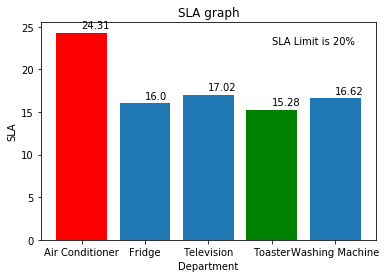

In [76]:
#SLA_limit=abandon_percent.unstack()
x=['Air Conditioner','Fridge','Television','Toaster','Washing Machine']
y=[24.309392,16.000000,17.015707,15.277778,16.618076]
plt.bar(x,y)
plt.rcParams["figure.figsize"][0]=10
plt.annotate(xy=(3,23), s='SLA Limit is 20%')
plt.bar(x[y.index(max(y))],max(y), label='Highest SLA', color='red')
plt.bar(x[y.index(min(y))],min(y), label='Lowest SLA', color='green')
for a in range(len(x)):
    plt.annotate(xy=[x[a],y[a]+0.5], s=round(y[a],2))
plt.xlabel("Department")
plt.ylabel("SLA")
plt.title("SLA graph")
plt.show()


In [77]:
def getperformance(Department):
    if Department=='Air Conditioner':
        print("Total calls are-:",total_call_dept[0])
        print("Total call answered-:",ans_call_dept_y[0])
        print("Abandon percentage-:",abandon_percent[0])
        if abandon_percent[0]>20:
            print("SLA Breached !!")
        else:
            print("SLA not Breached- Good!!")
    elif Department=='Fridge':
        print("Total calls are-:",total_call_dept[1])
        print("Total call answered-:",ans_call_dept_y[1])
        print("Abandon percentage-:",abandon_percent[1])
        if abandon_percent[1]>20:
            print("SLA Breached !!")
        else:
            print("SLA not Breached- Good!!")
    elif Department=='Television':
        print("Total calls are-:",total_call_dept[2])
        print("Total call answered-:",ans_call_dept_y[2])
        print("Abandon percentage-:",abandon_percent[2])
        if abandon_percent[2]>20:
            print("SLA Breached !!")
        else:
            print("SLA not Breached- Good!!")
    elif Department=='Toaster':
        print("Total calls are-:",total_call_dept[3])
        print("Total call answered-:",ans_call_dept_y[3])
        print("Abandon percentage-:",abandon_percent[3])
        if abandon_percent[3]>20:
            print("SLA Breached !!")
        else:
            print("SLA not Breached- Good!!")
    elif Department=='Washing Machine':
        print("Total calls are-:",total_call_dept[4])
        print("Total call answered-:",ans_call_dept_y[4])
        print("Abandon percentage-:",abandon_percent[4])
        if abandon_percent[4]>20:
            print("SLA Breached !!")
        else:
            print("SLA not Breached- Good!!")
    else:
        print("No records found !!")

In [78]:
getperformance('Washing Machine')

Total calls are-: 343
Total call answered-: 286
Abandon percentage-: 16.61807580174927
SLA not Breached- Good!!


In [79]:
df.head(3)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00,1


In [80]:
df['Satisfaction_rating'].fillna((df['Satisfaction_rating'].mean()),inplace=True)
#df['Satisfaction_rating'].interpolate(df['Satisfaction_rating'])

In [81]:
df.head(3)

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00,1


In [82]:
#overall satisfaction
df['Satisfaction_rating'].mean()

3.4542955326460447

In [83]:
# satisfaction weekly
satisfaction_weekly = df.groupby('Week_Number')['Satisfaction_rating'].mean()
satisfaction_weekly

Week_Number
00    3.372060
01    3.490312
02    3.406126
03    3.566513
04    3.420736
05    3.257526
Name: Satisfaction_rating, dtype: float64

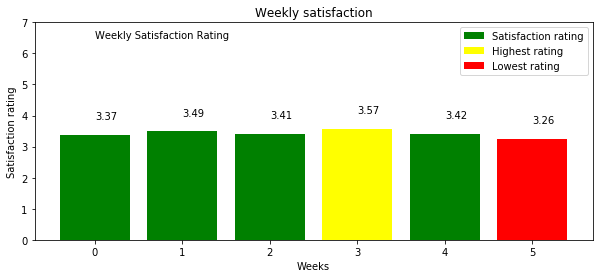

In [84]:
import matplotlib.pyplot as plt
x = [0,1,2,3,4,5]
y = [3.372060,3.490312,3.406126,3.566513,3.420736,3.257526]
plt.bar(x,y, label='Satisfaction rating', color='green')
plt.annotate(xy=(0,6.5), s='Weekly Satisfaction Rating')
for a in range(len(x)):
    plt.annotate(xy=[x[a],y[a]+.5], s=round(y[a],2))
plt.bar(x[y.index(max(y))], max(y), color='yellow',label='Highest rating')
plt.bar(x[y.index(min(y))], min(y), color='red',label='Lowest rating')
plt.xlabel("Weeks")
plt.ylabel("Satisfaction rating")
plt.title("Weekly satisfaction")
plt.ylim(0,7)
plt.legend()
plt.show()

In [85]:
# satisfaction agentwise
satisfaction_agent = df.groupby('Agent')['Satisfaction_rating'].mean()
satisfaction_agent

Agent
Becky      3.396840
Dan        3.483740
Diane      3.431572
Greg       3.513944
Jim        3.436957
Joe        3.370590
Martha     3.523911
Stewart    3.478213
Name: Satisfaction_rating, dtype: float64

In [86]:
y=satisfaction_agent.to_list()
y

[3.3968403970981265,
 3.4837398004753455,
 3.4315717779635286,
 3.513943959820246,
 3.436956652800384,
 3.3705897902380597,
 3.523911277725708,
 3.478213058419242]

In [87]:
x=satisfaction_agent.index.to_list()
x

['Becky', 'Dan', 'Diane', 'Greg', 'Jim', 'Joe', 'Martha', 'Stewart']

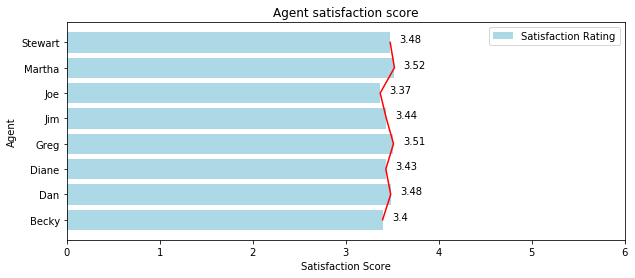

In [88]:
plt.barh(x,y, label='Satisfaction Rating', color='lightblue')
plt.plot(y,x, color='red')
for a in range(len(y)):
    plt.annotate(xy=[y[a]+.1,x[a]], s=round(y[a],2))
plt.xlim(0,6)
plt.xlabel("Satisfaction Score")
plt.ylabel("Agent")
plt.title("Agent satisfaction score")
plt.legend()
plt.show()


In [190]:
df

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.000000,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.000000,False,00,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.000000,False,00,1
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.000000,False,00,1
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.000000,False,00,1
5,ID0006,2016-01-01 10:00:28.800,Stewart,Air Conditioner,N,N,NaN,NaN,3.454296,False,00,1
6,ID0007,2016-01-01 10:22:04.800,Diane,Toaster,Y,Y,24.0,00:03:40.342000,2.000000,False,00,1
7,ID0008,2016-01-01 10:22:04.800,Diane,Toaster,Y,Y,22.0,00:00:38.344000,4.000000,False,00,1
8,ID0009,2016-01-01 11:13:55.200,Greg,Fridge,Y,Y,15.0,00:06:38.450000,4.000000,False,00,1
9,ID0010,2016-01-01 11:13:55.200,Jim,Television,Y,Y,78.0,00:01:03.753000,3.000000,False,00,1


In [191]:
# calls with satisfaction
score_satisfaction=df.groupby(['Satisfaction_rating'])['call_id'].count()
score_satisfaction

Satisfaction_rating
1.000000    121
2.000000    146
3.000000    457
3.454296    317
4.000000    413
5.000000    318
Name: call_id, dtype: int64

In [192]:
# calls with less than 3 satisfaction score
call_score3 = [121+146]
call_score3


[267]

In [90]:
sr=df['Avg_talk_duration'].head()

In [170]:
for a in range(sr.shape[0]):
    print(a,sr[a], str(sr[a]).split(":"))

0 00:02:23.210000 ['00', '02', '23.210000']
1 00:04:02.323000 ['00', '04', '02.323000']
2 00:02:11.202000 ['00', '02', '11.202000']
3 00:00:37.481000 ['00', '00', '37.481000']
4 00:01:00.083000 ['00', '01', '00.083000']


In [92]:
for a in range(sr.shape[0]):
    print(str(sr[a]).split(":")[0])

00
00
00
00
00


In [168]:
for a in range(sr.shape[0]):
    print(str(sr[a]).split(":")[1])

02
04
02
00
01


In [162]:
for a in range(sr.shape[0]):
    print(str(sr[a]).split(":")[2])

23.210000
02.323000
11.202000
37.481000
00.083000


In [194]:
df.head()

,call_id,Date,Agent,Department,Answered,Resolved,Speed_of_ans,Avg_talk_duration,Satisfaction_rating,Column1,Week_Number,Day
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,00,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,00,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,00,1
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,00,1
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,00,1


In [205]:
df[df.Answered=='Y'].Agent.value_counts()

Dan        190
Jim        187
Joe        186
Stewart    186
Diane      185
Becky      177
Greg       173
Martha     171
Name: Agent, dtype: int64

In [206]:
df[df.Answered=='N'].Agent.value_counts()

Martha     49
Stewart    44
Jim        41
Becky      39
Diane      37
Dan        37
Joe        35
Greg       35
Name: Agent, dtype: int64

In [248]:
df[df.Agent=='Dan'].Answered.value_counts()

Y    190
N     37
Name: Answered, dtype: int64